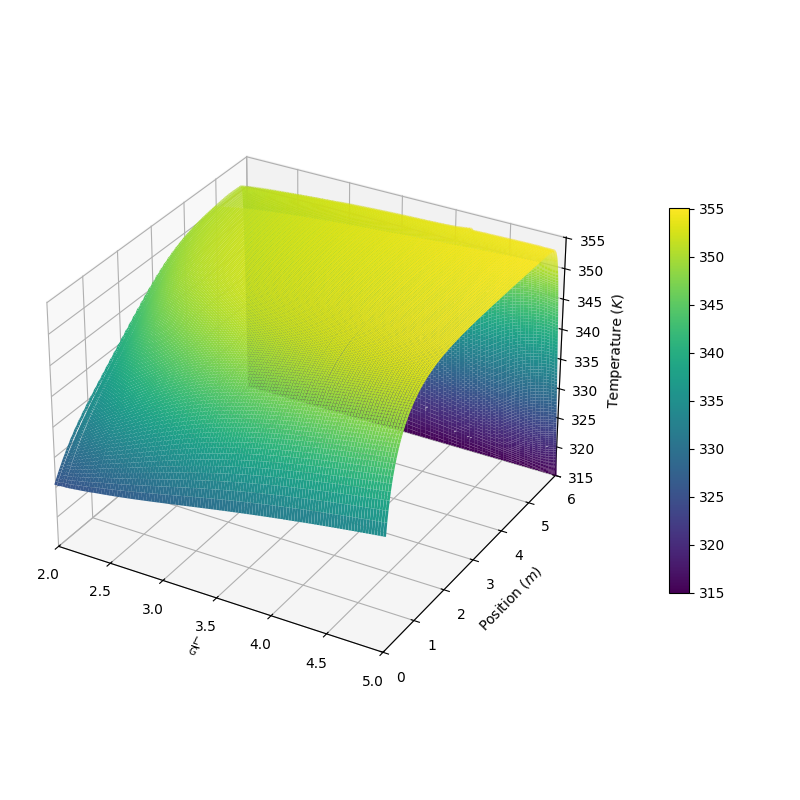

In [11]:
import numpy as np
import pandas as pd
from Parameters import column_params, n
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Line3DCollection
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable, viridis
%matplotlib widget

# Load data
df = pd.read_csv('data/runs_file_NCCC_LHC.csv', index_col=0)
Tl_matrix = np.loadtxt("data/Tl_matrix.csv", delimiter=',')
Tv_matrix = np.loadtxt("data/Tv_matrix.csv", delimiter=',')

# Coordinates and Z matrix
X = df['L_G'].to_numpy()
Y = np.linspace(0, 5, n)
Y = np.append(Y, np.linspace(5.01, column_params['NCCC']['H'], (2 * n) - 2))
X_grid, Y_grid = np.meshgrid(X, Y)  # Shape: [n, len(X)]

# Choose Z matrix (e.g., Tl_matrix or Tv_matrix)
Z = Tl_matrix


# Build line segments column-wise (along Y-axis)
segments = []
colors = []

for j in range(Z.shape[1]):  # Loop over columns (constant X)
    x_line = X_grid[:, j]
    y_line = Y_grid[:, j]
    z_line = Z[:, j]

    # Build segment points
    points = np.array([x_line, y_line, z_line]).T
    segs = np.stack([points[:-1], points[1:]], axis=1)
    segments.extend(segs)

    # Average Z per segment (used for color mapping)
    avg_z = 0.5 * (z_line[:-1] + z_line[1:])
    colors.extend(avg_z)

# Normalize and apply colormap
norm = Normalize(vmin=Z.min(), vmax=Z.max())
cmap = viridis

# Create Line3DCollection with color array and normalization
lc = Line3DCollection(segments, cmap=cmap, norm=norm, linewidths=2)
lc.set_array(np.array(colors))  # Raw avg-Z values (used for coloring)

# Plotting
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.add_collection3d(lc)

# Set axis limits
ax.set_xlim(X.min(), X.max())
ax.set_ylim(Y.min(), Y.max())
ax.set_zlim(Z.min(), Z.max())

# Axis labels
ax.set_xlabel(r'$\frac{L}{G}$')
ax.set_ylabel(r'Position $\left(m\right)$')
ax.set_zlabel(r'Temperature $\left(K\right)$')

# Add colorbar matching full Z range
sm = ScalarMappable(norm=norm, cmap=cmap)
sm.set_array(Z)
fig.colorbar(sm, ax=ax, shrink=.5, ticks=np.linspace(Z.min(), np.floor(Z.max()), 9), pad=.1)

plt.tight_layout()
plt.show()


[ 0.          0.10083842  0.20064886  0.2984138   0.39313661  0.48385164
  0.56963411  0.64960951  0.72296256  0.78894546  0.84688556  0.8961922
  0.93636273  0.96698762  0.98775469  0.99845223  0.99897117  0.98930624
  0.96955595  0.93992165  0.90070545  0.85230712  0.79522006  0.73002623
  0.65739025  0.57805259  0.49282204  0.40256749  0.30820902  0.21070855
  0.11106004  0.01027934 -0.09060615 -0.19056796 -0.28858706 -0.38366419
 -0.47483011 -0.56115544 -0.64176014 -0.7158225  -0.7825875  -0.84137452
 -0.89158426 -0.93270486 -0.96431712 -0.98609877 -0.99782778 -0.99938456
 -0.99075324 -0.97202182 -0.94338126 -0.90512352 -0.85763861 -0.80141062
 -0.73701276 -0.66510151 -0.58640998 -0.50174037 -0.41195583 -0.31797166
 -0.22074597 -0.12126992 -0.0205576   0.0803643   0.18046693  0.27872982
  0.37415123  0.46575841  0.55261747  0.63384295  0.7086068   0.77614685
  0.83577457  0.8868821   0.92894843  0.96154471  0.98433866  0.99709789
  0.99969234  0.99209556  0.97438499  0.94674118  0.

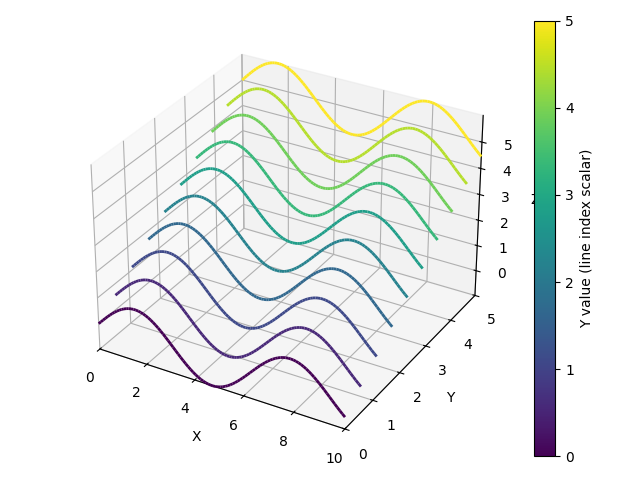

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Line3DCollection
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable, viridis

# Create data: multiple lines
x = np.linspace(0, 10, 100)
y_vals = np.linspace(0, 5, 10)  # 10 separate Y lines
z_func = lambda x, y: np.sin(x) + y  # Z values dependent on x and y

# Prepare segments for Line3DCollection
segments = []
colors = []

for i, y in enumerate(y_vals):
    z = z_func(x, y)
    points = np.array([x, np.full_like(x, y), z]).T  # shape (100, 3)
    segs = np.stack([points[:-1], points[1:]], axis=1)  # shape (99, 2, 3)
    segments.extend(segs)

    # Example scalar coloring by line index (you could use max(z), mean(z), etc.)
    line_color = y  # scalar value to color line
    colors.extend([line_color] * (len(x)-1))

# Normalize and colormap
norm = Normalize(vmin=min(colors), vmax=max(colors))
cmap = viridis
mappable_colors = cmap(norm(colors))

# Create Line3DCollection
lc = Line3DCollection(segments, colors=mappable_colors, linewidths=2)

# Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.add_collection3d(lc)

# Set axis limits
ax.set_xlim(min(x), max(x))
ax.set_ylim(min(y_vals), max(y_vals))
ax.set_zlim(np.min([z_func(x, y) for y in y_vals]), np.max([z_func(x, y) for y in y_vals]))

# Add colorbar
sm = ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])  # required even though we colored lines manually
fig.colorbar(sm, ax=ax, label='Y value (line index scalar)')

# Axis labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.tight_layout()
plt.show()
